In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from google.colab import files
import io

In [5]:
# Upload the dataset
print("Please upload the SMS Spam dataset CSV file.")
uploaded = files.upload()


Please upload the SMS Spam dataset CSV file.


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [6]:
# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('latin-1')))

In [7]:
# Display basic information
display(df.head())
display(df.info())

df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)  # Remove unnecessary columns


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

In [15]:
df.isnull().sum()

,0
CreditScore,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [16]:
df.duplicated().sum()

0

In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)


In [9]:
# Define features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Accuracy: 0.8110
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



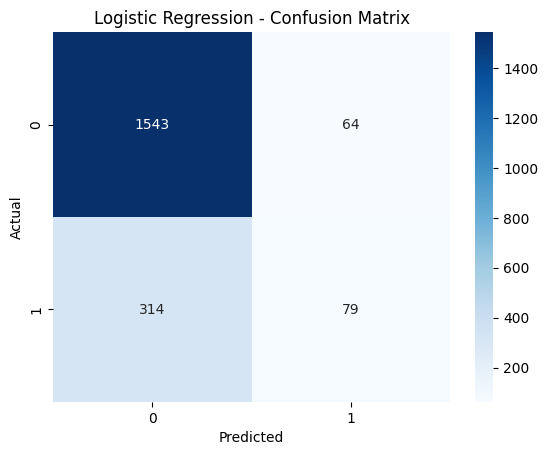

Random Forest Accuracy: 0.8665
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



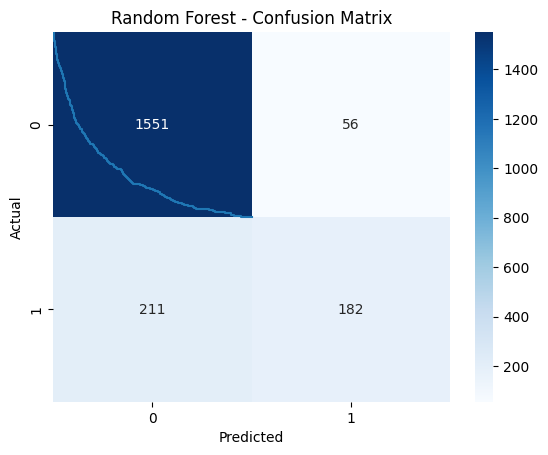

Gradient Boosting Accuracy: 0.8675
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



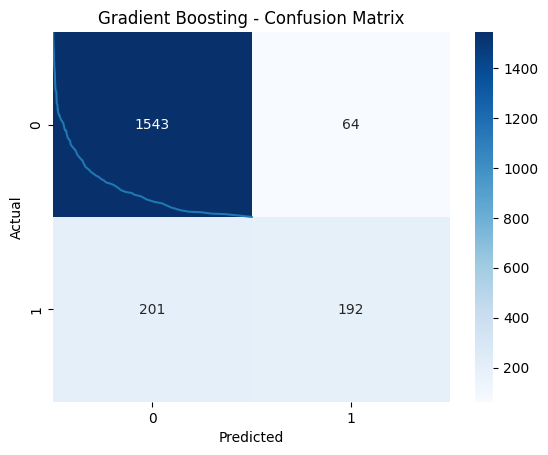

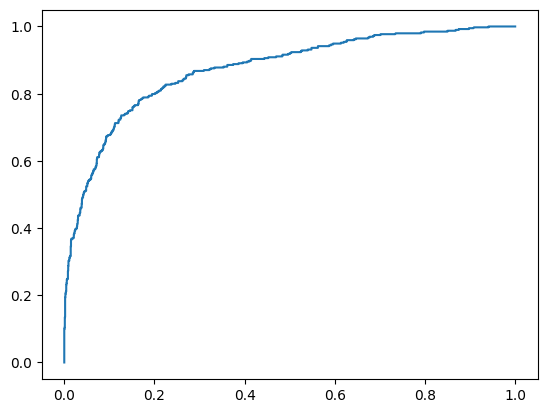

In [12]:
# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")


<ipython-input-13-0e4bd2828528>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


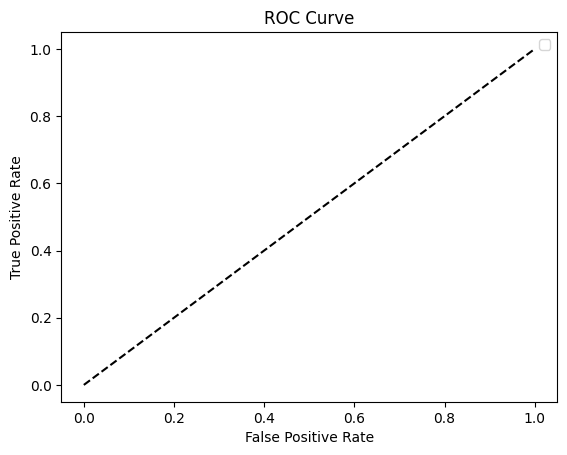

In [13]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [14]:
# Print final results
display(pd.DataFrame(results, index=["Accuracy"]))


,Logistic Regression,Random Forest,Gradient Boosting
Accuracy,0.811,0.8665,0.8675


In [17]:
# Real-world example testing
test_customers = pd.DataFrame({
    "CreditScore": [650, 800],
    "Gender": [1, 0],
    "Age": [40, 30],
    "Tenure": [3, 5],
    "Balance": [10000, 50000],
    "NumOfProducts": [2, 1],
    "HasCrCard": [1, 1],
    "IsActiveMember": [0, 1],
    "EstimatedSalary": [50000, 100000],
    "Geography_Germany": [1, 0],
    "Geography_Spain": [0, 1]
})

In [18]:
# Scale test customers
test_customers_scaled = scaler.transform(test_customers)


In [19]:
# Make predictions using the best model (based on accuracy)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
predictions = best_model.predict(test_customers_scaled)

display(pd.DataFrame({"Customer": ["A", "B"], "Predicted Churn": predictions}))

,Customer,Predicted Churn
0,A,0
1,B,0
